# Unsuperviesed Learning (Lecture focused on Cluster Analysis)

The machine learning task of inferring a function that describes the structure of "unlabeled" data (i.e. data that has not been classified or categorized). Clustering is one category of unsupervised learning.

## Cluster Analysis

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

### 1. Type of Cluster Analysis

Note that there exist a lot of different clustering criteria and associated algorithms. The simplest clustering algorithm is K-means. Thus, our lecture will focus on K-means.

   * Partitioning (Centroid-based) Methods - our focus of the lecture
   * Hierarchical Methods
   * Density-Based Methods
   * Grid-Based Methods


### 2. Application of Clustering

* Recommendation engines
* Market segmentation
* Social network analysis
* Search result grouping
* Medical imaging
* Image segmentation
* Anomaly detection

### 3. K-Means

Step 1: It starts with K as the input which is how many clusters you want to find. Place K centroids in random locations in your space.

<img src="1.png">

Step 2: Now, using the euclidean distance between data points and centroids, assign each data point to the cluster which is close to it.

<img src="2.png">

Step 3: Recalculate the cluster centers as a mean of data points assigned to it.

<img src="3.png">

Step 4: Repeat 2 and 3 until no further changes occur (Convergence)

<img src="4.png">

<img src="9.gif">

### 4-1. Advantage of K-Means

* Practically work well even some statistical assumptions are broken
* Simple, easy to implement
* Easy to interpret the clustering results
* Fast and efficient in terms of computational cost

### 4-2. Drawback of K-Means

* The number of clusters k is an input parameter: an inappropriate choice of k may yield poor results. That is why, when performing k-means, it is important to run diagnostic checks for determining the number of clusters in the data set.
* Convergence to a local minimum may produce counterintuitive ("wrong") results 

<img src="6.png">

<img src="7.png">

#### Thus, we have to have proper understanding about the given data to select the most best algorithm

#### (Reference) DBSCAN

<img src="5.gif">

### 5. Code Examples

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import datasets
import sklearn.metrics as sm

In [2]:
# Iris Dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

<img src="10.png">

#### Everytime setting the number of clusters is problematic.
* Not a solution, but we have some practical ways to get clues (WCSS)

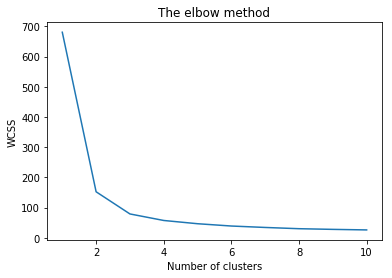

In [3]:
# Finding the optimum number of clusters for k-means classification
# Practical solution to set the right number of cluster
# WCSS is the sum of the squared deviations from each observation and the cluster centroid.

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#### Clustering result with 3 clusters (K=3)

Text(0.5,0.92,'K Means')

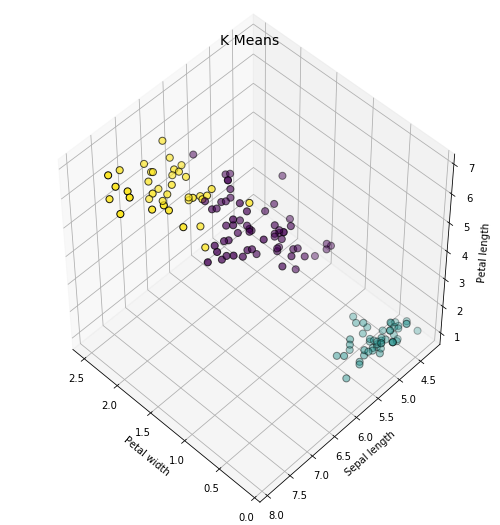

In [4]:
#KMeans coding
km = KMeans(n_clusters=3)
km.fit(x)
km.predict(x)
labels = km.labels_

#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

#### Note: Labels will not be used in real analysis (Unsupervised)

In [5]:
# Performance Metrics
predY = np.choose(km.labels_, [1, 0, 2]).astype(np.int64)
sm.accuracy_score(y, predY)

0.89333333333333331

#### Clustering result with 4 clusters (K=4)

Text(0.5,0.92,'K Means')

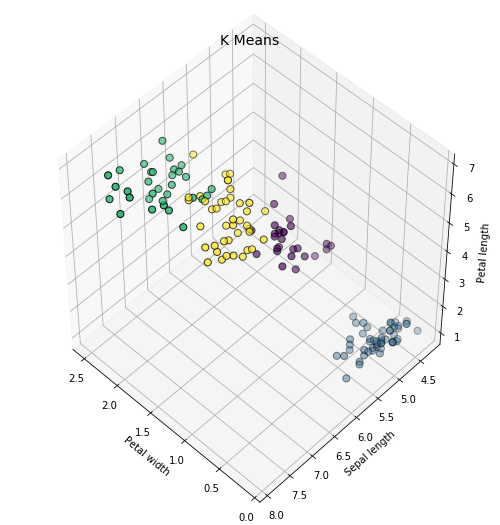

In [6]:
#KMeans coding
km = KMeans(n_clusters=4)
km.fit(x)
km.predict(x)
labels = km.labels_

#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)